# Homework IV - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming and critical analysis [11v]

**In the next exercise you will use the `accounts.csv` dataset. This dataset contains account details of bank clients, and the target variable `y` is binary (‘has the client subscribed a term deposit?’).\
Select the first 8 features and remove duplicates and null values.**

**_Hint:_ You can use `get_dummies()` to change the feature type (e.g. `pd.get_dummies(data,
drop_first=True)`).**

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv("./data/accounts.csv")

X = X.iloc[:, :8]   

X.dropna(inplace = True)
X.drop_duplicates(inplace = True)
X = pd.get_dummies(X, drop_first = True)

### 1) Normalize the data using the Min-Max Scaler.

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
numeric_features = ["age", "balance"]

X_normalized = X.copy()
X_normalized[numeric_features] = MinMaxScaler().fit_transform(X[numeric_features])

a. [4.0v] **Using `sklearn`, apply _k_-means clustering (without targets) on the normalized
data with `k={2,3,4,5,6,7,8}`, `max_iter=500` and `random_state=42`. Plot the
different sum of squared errors (SSE) using the `_inertia` attribute of _k_-means according to the number of clusters.**

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Patrícia\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

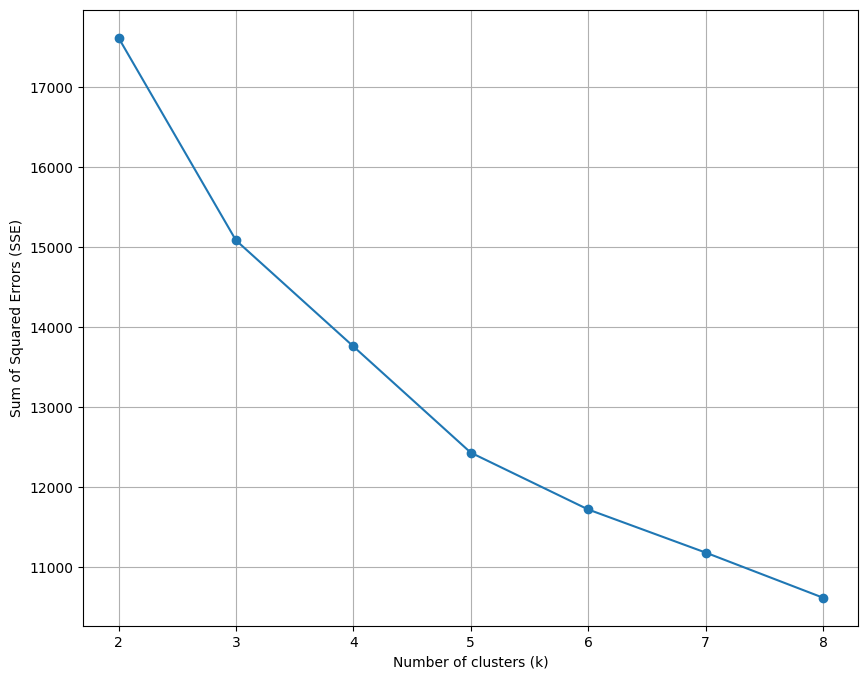

In [6]:
k_values = [2, 3, 4, 5, 6, 7, 8]
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 42, max_iter = 500)
    kmeans_model = kmeans.fit(X_normalized)
    sse.append(kmeans_model.inertia_)

plt.figure(figsize = (10, 8))
plt.plot(k_values, sse, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)

plt.show()

b. [1.5v] **According to the previous plot, how many underlying customer segments
(clusters) should there be? Explain based on the trade-off between the clusters and
inertia.**

To determine the optimal number of clusters, we typically use the "elbow method," which involves plotting the Sum of Squared Errors (SSE) - also known as inertia - across different values of k. Inertia represents the sum of squared distances between data points and their assigned cluster center. The optimal cluster count is suggested by an "elbow" in the plot, marking the point where additional clusters yield diminishing reductions in SSE.

In this plot, there is not a very defined "elbow," but we can argue that k = 3 is the point that most resembles one. This suggests that 3 clusters provide a suitable balance between minimizing inertia and avoiding excessive complexity. Additionally, the SSE drop between k = 2 and k = 3 is larger than the subsequent drop from k = 3 to k = 4, reinforcing k = 3 as a natural stopping point. A minor shift in inertia reduction is also observed around k = 5, but it is less pronounced, further supporting 3 clusters as the most reasonable choice based on the trade-off between interpretability and SSE reduction.

c. [1.5v] **Would _k_-modes be a better clustering approach? Explain why based on the
dataset features.**

K-modes not be a better clustering approach for this dataset because it is designed specifically for clustering categorical data, forming clusters based on the mode (most frequent category) rather than the mean. Since this dataset includes both numerical and categorical features, k-modes would not be suitable.

A more appropriate choice would be k-prototypes, which can directly handle mixed data, or alternatively, k-means with one-hot encoding (dummification) of categorical variables. These approaches better accommodate the dataset’s numerical and categorical information, making them more effective options.

### 2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_features = ["age", "balance"]

X_normalized = X.copy()
X_normalized[numeric_features] = StandardScaler().fit_transform((X[numeric_features]))

a. [1v] **Apply PCA to the data. How much variability is explained by the top 2
components?**

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2)
pca.fit(X_normalized)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.23520803 0.19396517]


The top two components explain 52.1% of the data variability, with the first component accounting for 29.14% and the second for 23%.

b. [1v] **Apply _k_-means clustering with `k=3` and `random_state=42` (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.**

In [10]:
import seaborn as sns

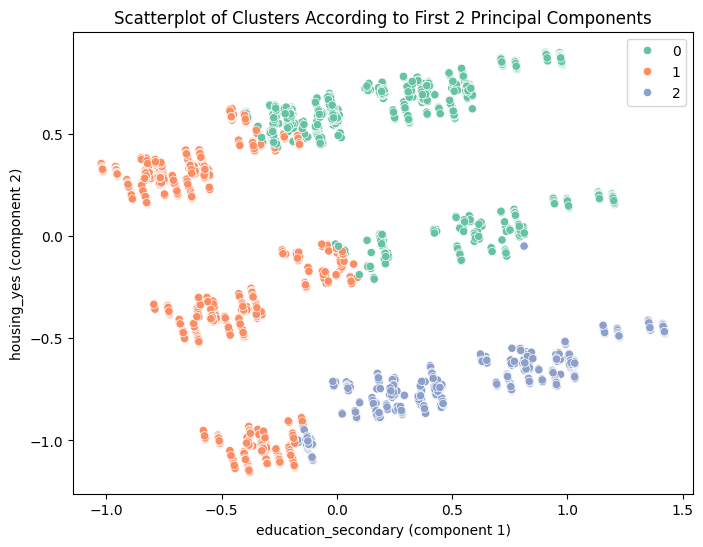

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_normalized)  

pca_components = pca.fit_transform(X_normalized)

selected_features = list(X_normalized.var().sort_values(ascending = False).head(2).index)

plt.figure(figsize = (8, 6))
sns.scatterplot(x = pca_components[:, 0], y = pca_components[:, 1], hue = clusters, palette = "Set2")
plt.xlabel(selected_features[0] + " (component 1)")
plt.ylabel(selected_features[1] + " (component 2)")
plt.title("Scatterplot of Clusters According to First 2 Principal Components")

plt.show()

The scatterplot of the clusters projected onto the first two principal components indicates that the clusters can be moderately separated, but the boundaries are not entirely distinct, with some overlap present. 

Cluster 1 (in orange) shows strong cohesion, with points tightly clustered together, suggesting low internal variability. Cluster 0 (in green) is also relatively compact, though it appears slightly more dispersed than Cluster 1, suggesting a moderate level of cohesion.Cluster 2 (in blue), however, is more spread out, indicating a weaker cohesion and higher internal variability. This spread might reflect aspects of the original data that are not fully captured by the first two principal components.

Despite the proximity of the clusters, minimal overlap suggests they are reasonably well-separated in this two-dimensional projection. Overall, while the clusters are not perfectly distinct, they display enough separation to indicate that each group possesses unique characteristics, even if Cluster 2 shows greater variability.

c [2v] **Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use _sns.distplot_
(see Data Exploration notebook), with `multiple="dodge"`, `stat='density'`,
`shrink=0.8` and `common_norm=False`. Describe the main differences between the
clusters in no more than half a page.**


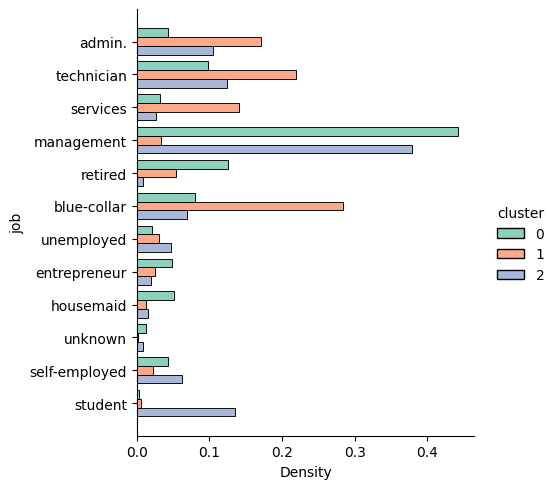

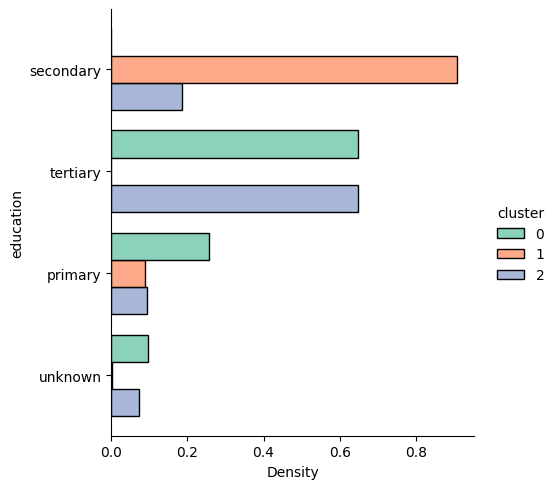

In [12]:
X = pd.read_csv("./data/accounts.csv")

X = X.iloc[:, :8]   

X.dropna(inplace = True)
X.drop_duplicates(inplace = True)

X["cluster"] = clusters

sns.displot(
    data = X, 
    y = "job",
    hue = "cluster",
    multiple = "dodge",
    stat = "density",
    shrink = 0.8,
    common_norm = False,
    palette = "Set2"
)

sns.displot(
    data = X,  
    y = "education",
    hue = "cluster",
    multiple="dodge",
    stat = "density",
    shrink = 0.8,
    common_norm = False,
    palette = "Set2"
)

plt.show()